Introduction to Tabular data

In [9]:
# Importing the libraries
# OS library is used to interact with os file system. It helps in creating new directory and save visualizations that we have created with the help of python.
import os

# pandas -> used to read and interpret csv file
import pandas as pd

# numpy -> to convert data from csv to array or other required formats
import numpy as np

# seaborn -> uses Matplotlib to plot graphs from the datas. Used to visualize random distributions.
import seaborn as sns

# matplotlib -> to visualize and plot data
import matplotlib.pyplot as plt

In [10]:
# pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')

# pd.read_csv('/Users/shubhamk/Documents/GitHub/Astronomical_Visualization/cleaned_star_data.csv')

#Storing data in variable star_df
star_df = pd.read_csv('https://raw.githubusercontent.com/Shubham91999/Astronomical_Visualization/main/cleaned_star_data.csv')

#To check the datatype of returned result
type(pd.read_csv('https://raw.githubusercontent.com/Shubham91999/Astronomical_Visualization/main/cleaned_star_data.csv'))

#head() is used to return first 5 rows of the result set
star_df.head()

#sample() is used to analyze the random rows from dataset, here 10 rows are selected randomly
star_df.sample(10)

#Checking general information about the dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [11]:
star_df.sample(10)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
59,3535,195000.000000,1546.0000,-11.36,5,Red,M
153,16390,1278.000000,5.6800,-3.32,3,Blue-White,B
174,3600,240000.000000,1190.0000,-7.89,5,Red,M
201,15680,0.001220,0.0114,11.92,2,Blue,B
95,11250,672.000000,6.9800,-2.30,3,Blue-White,A
34,5800,0.810000,0.9000,5.05,3,Yellow-White,F
189,3523,0.000957,0.1290,16.35,0,Red,M
79,3158,0.001350,0.1610,13.98,1,Red,M
53,3749,550000.000000,1648.0000,-8.05,5,Red,M
84,14100,0.000670,0.0089,12.17,2,Blue-White,B


# Obervation

From above information we can say that, the dataset has 240 rows, 6 features and 1 target column.

* Features:
1. Absolute Temperature (in K)
2. Relative Luminosity (L/Lo)
3. Relative Radius (R/Ro)
4. Absolute Magnitude (Mv)
5. Star Color
6. Spectral Class

* Target Column:
Star Type 

Here,
1. Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
2. Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

* Two Categorical features which will need some kind of encoding
1. Star Color
2. Spectral Class

* Information on the star type is given below:
1. 0 -> Brown Dwarf
2. 1 -> Red Dwarf
3. 2 -> White Dwarf
4. 3 -> Main Sequence
5. 4 -> Supergiants
6. 5 -> Hypergiants






# Creating a directory to save the visualizations



In [13]:
#Create a directory to save visualization
folder_name  = 'star_plots'

#Using makedirs functionality of os to create new directory
os.makedirs(folder_name, exist_ok=True)

base_dir = f'/Users/shubhamk/Documents/GitHub/Astronomical_Visualization/{folder_name}/'



# Creating First Visualization

In [16]:
#Bar Chart for visualizing count of stars with respective type

#Accessing column Star Type from data set
star_df['Star type']

#Counting the number of stars for each type with value_counts()
star_df['Star type'].value_counts()

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

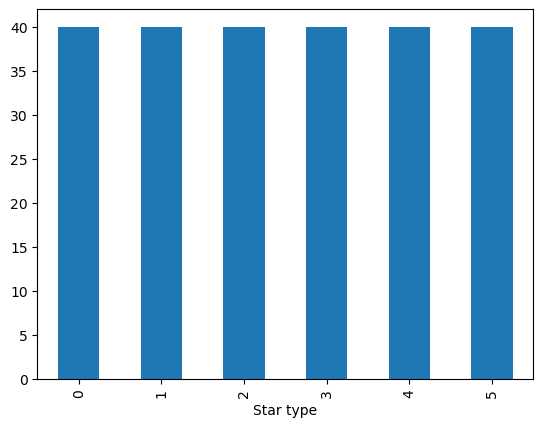

In [17]:
#Using plot from matplotlib to plot the bar chart 
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

# Customizing and Saving the plot


We will take care of following points to make bar chart more informative and attractive.

* Adjust the size of the figure according to your convinience
* Add the value of counts on top of bars
* Set the background to dark
* Change the color of each bar
* Add a title
* Add y label and change color of y ticks
* Replace x ticks from 0,1,2,3,4,5 to respective names of star type
* Save the plots in base directory

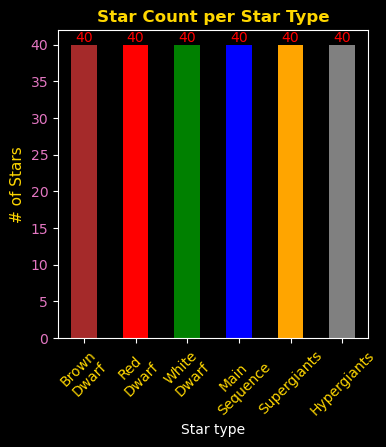

In [38]:
#Customizing the plot

#Adjusting size of plot
plt.figure(figsize=(4,4))


#Setting the background
plt.style.use('dark_background')
 
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'green', 'blue', 'orange', 'gray'])

#Adding labels on top of bars
ax.bar_label(ax.containers[0], color = 'red')

#Adding plot title
plt.title('Star Count per Star Type', color = 'gold', weight='bold')

#Adding color to yticks
plt.yticks(color='tab:pink')

#Adding y label
plt.ylabel('# of Stars', color='gold', fontsize= 11)

#Replacing x ticks with labels
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Brown\nDwarf',
'Red\nDwarf',
'White\nDwarf',
'Main\nSequence',
'Supergiants',
'Hypergiants'], rotation=45, color='gold')

#Saving figure as a image file
plt.savefig(base_dir+'barplot_star_count.png')

plt.show()

# Bar Graph using Seaborn

In [41]:
#Reading Star Color data
print(star_df['Star color'].value_counts().index)

star_df['Star color'].value_counts()

Index(['Red', 'Blue', 'Blue-White', 'Yellow-White', 'White'], dtype='object', name='Star color')


Star color
Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: count, dtype: int64

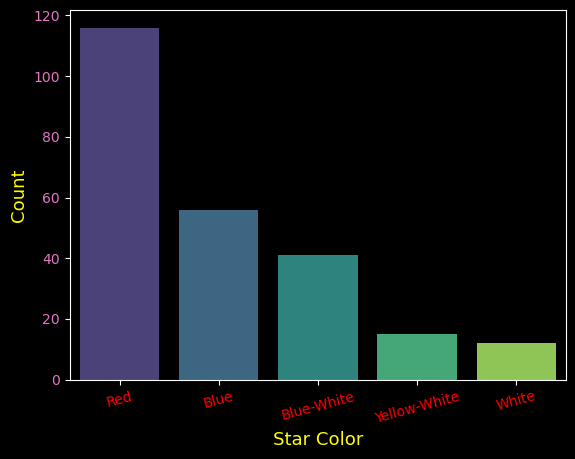

In [51]:
#Visualizing Star Color data with Seaborn and matplotlib
sns.barplot(x=star_df['Star color'].value_counts().index,
            y=star_df['Star color'].value_counts(),
            palette='viridis')

plt.xticks(rotation=15, color='red')
plt.yticks(color='tab:pink')

plt.xlabel('Star Color', color='Yellow', fontsize=13)
plt.ylabel('Count', color='Yellow', fontsize=13)

#plt.show() is used to remove axis labels. 
#Matplotlib makes it easier to to do things like changing plot title, tick labels and adding a legend.
plt.show()